### Import Required Packages

In [20]:
import os
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix

Found GPU at: /device:GPU:0


### Import Data

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Create Model

In [81]:

# Images start as 32 by 32 by 3
model = keras.models.Sequential()

# Convert to 32 by 32 by 32
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

# Convert to 16 by 16 by 32
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convert to 16 by 16 by 64
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

# Convert to 8 by 8 by 64
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convert to 8 by 8 by 128
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

# Convert to 4 by 4 by 128
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convert to FC layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 10))
model.add(keras.layers.Activation('softmax'))

# Compile Model
opt = keras.optimizers.RMSprop(learning_rate = .0001, decay = 1e-6)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])


losses, accuracy = ([], [])


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_55 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)      

### Train Model

10000/10000 [==============================] - 1s 106us/sample - loss: 2.2588 - acc: 0.7174


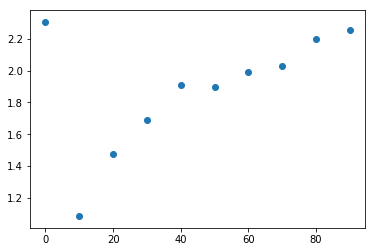

[[765  13  75  20  29  19   8  18  52  15]
 [ 10 796  11  14   6   6   7   8  20  56]
 [ 28   4 567  65  57  49  47  31   4   5]
 [ 20   6  82 582  82 208  73  50   9   9]
 [ 15   3  79  46 650  39  26  60   2   4]
 [  8   8  71 135  43 588  38  66   6   2]
 [  9  10  59  61  50  25 775  12   5   4]
 [  6   3  20  21  58  35   3 716   1   9]
 [ 91  45  20  31  16  16  16   8 876  37]
 [ 48 112  16  25   9  15   7  31  25 859]]


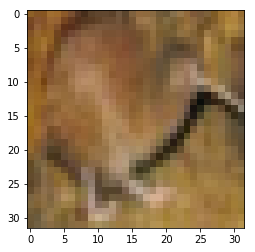

airplane: 1.6356892e-10
car: 5.377448e-13
bird: 0.7196771
cat: 0.277329
deer: 0.0001998674
dog: 3.825357e-08
frog: 0.002793951
horse: 7.600553e-08
ship: 1.7736425e-17
truck: 4.8979245e-12


In [82]:
for i in range(10):
    
    clear_output()
    
    l, a = model.evaluate(x_test, y_test)
    losses.append(l)
    accuracy.append(a)
    
    plt.clf()
    plt.scatter(x = [10 * j for j in range(len(losses))], y = losses)
    plt.show()
    
    preds = np.argmax(model.predict(x_test), axis = 1)
    actuals = np.argmax(y_test, axis = 1)

    print(confusion_matrix(preds, actuals))
    
    rand_image = np.random.choice(a = x_test.shape[0], size = 1)
    plt.clf()
    plt.imshow(x_test[rand_image].reshape(32, 32, 3))
    plt.show()

    classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    probs = model.predict(x_test[rand_image])

    output = {classes[i]: probs[0][i] for i in range(10)}

    for k, v in output.items():
        print(k + ': ' + str(v))
        
    model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True, verbose = 0)
        
    
    
    

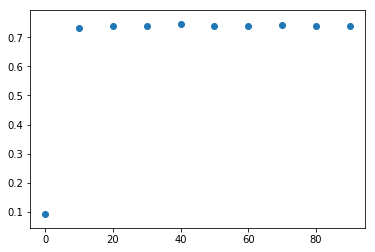

In [72]:
plt.clf()
plt.scatter(x = [10 * j for j in range(len(losses))], y = accuracy)